<a href="https://colab.research.google.com/github/Ashay-20/COLAB/blob/main/stocks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import calendar

In [ ]:
# !pip install --upgrade matplotlib

# Reading Data & Feature Engineering

In [3]:
df = pd.read_csv('/content/Equity Data (1 Jan 2020).csv')
df[' DATE1'] = pd.to_datetime(df[' DATE1'],dayfirst=True)
df["month"]=df[' DATE1'].dt.month
df["year"]=df[' DATE1'].dt.year
df["day of month"]=df[' DATE1'].dt.day
df['profit']= (df[' CLOSE_PRICE']-df[" OPEN_PRICE"])* df[' DELIV_QTY']

# Function for plotting top performers and non performers

In [4]:
def first_n_last(yr):
    plt.style.use('ggplot')
    plt.figure(figsize=(15, 40))

    if yr==2022:
        mx_mnth=3
    else:
        mx_mnth=13
    for i in range(1,mx_mnth):
        ax = plt.subplot(6, 2, i, ymargin=0.5)
        tt=(df[(df.year==yr) & (df.month==i)].groupby(['SYMBOL']).sum().reset_index().sort_values(by=['profit'],ascending=False)[['SYMBOL',"profit"]].head(3)).append((df[(df.year==yr) & (df.month==i)].groupby(['SYMBOL']).sum().reset_index().sort_values(by=['profit'],ascending=False)[['SYMBOL',"profit"]].tail(3)))
        color=["red" if i>=3 else "green" for i,_ in enumerate(tt['profit'])]
        ax.bar_label(plt.bar(tt["SYMBOL"],tt["profit"],width = 0.5,color=color),padding=3)
        ax.set_title(f"Top 3 top performing and non performing shares of {calendar.month_name[i]} {yr}",y=1.05)
    plt.suptitle(f'Stock Performance of {yr}', y=1.01)
    plt.tight_layout(h_pad=3.0)
    plt.show()

# Top 3 performers and non performers of year 2020

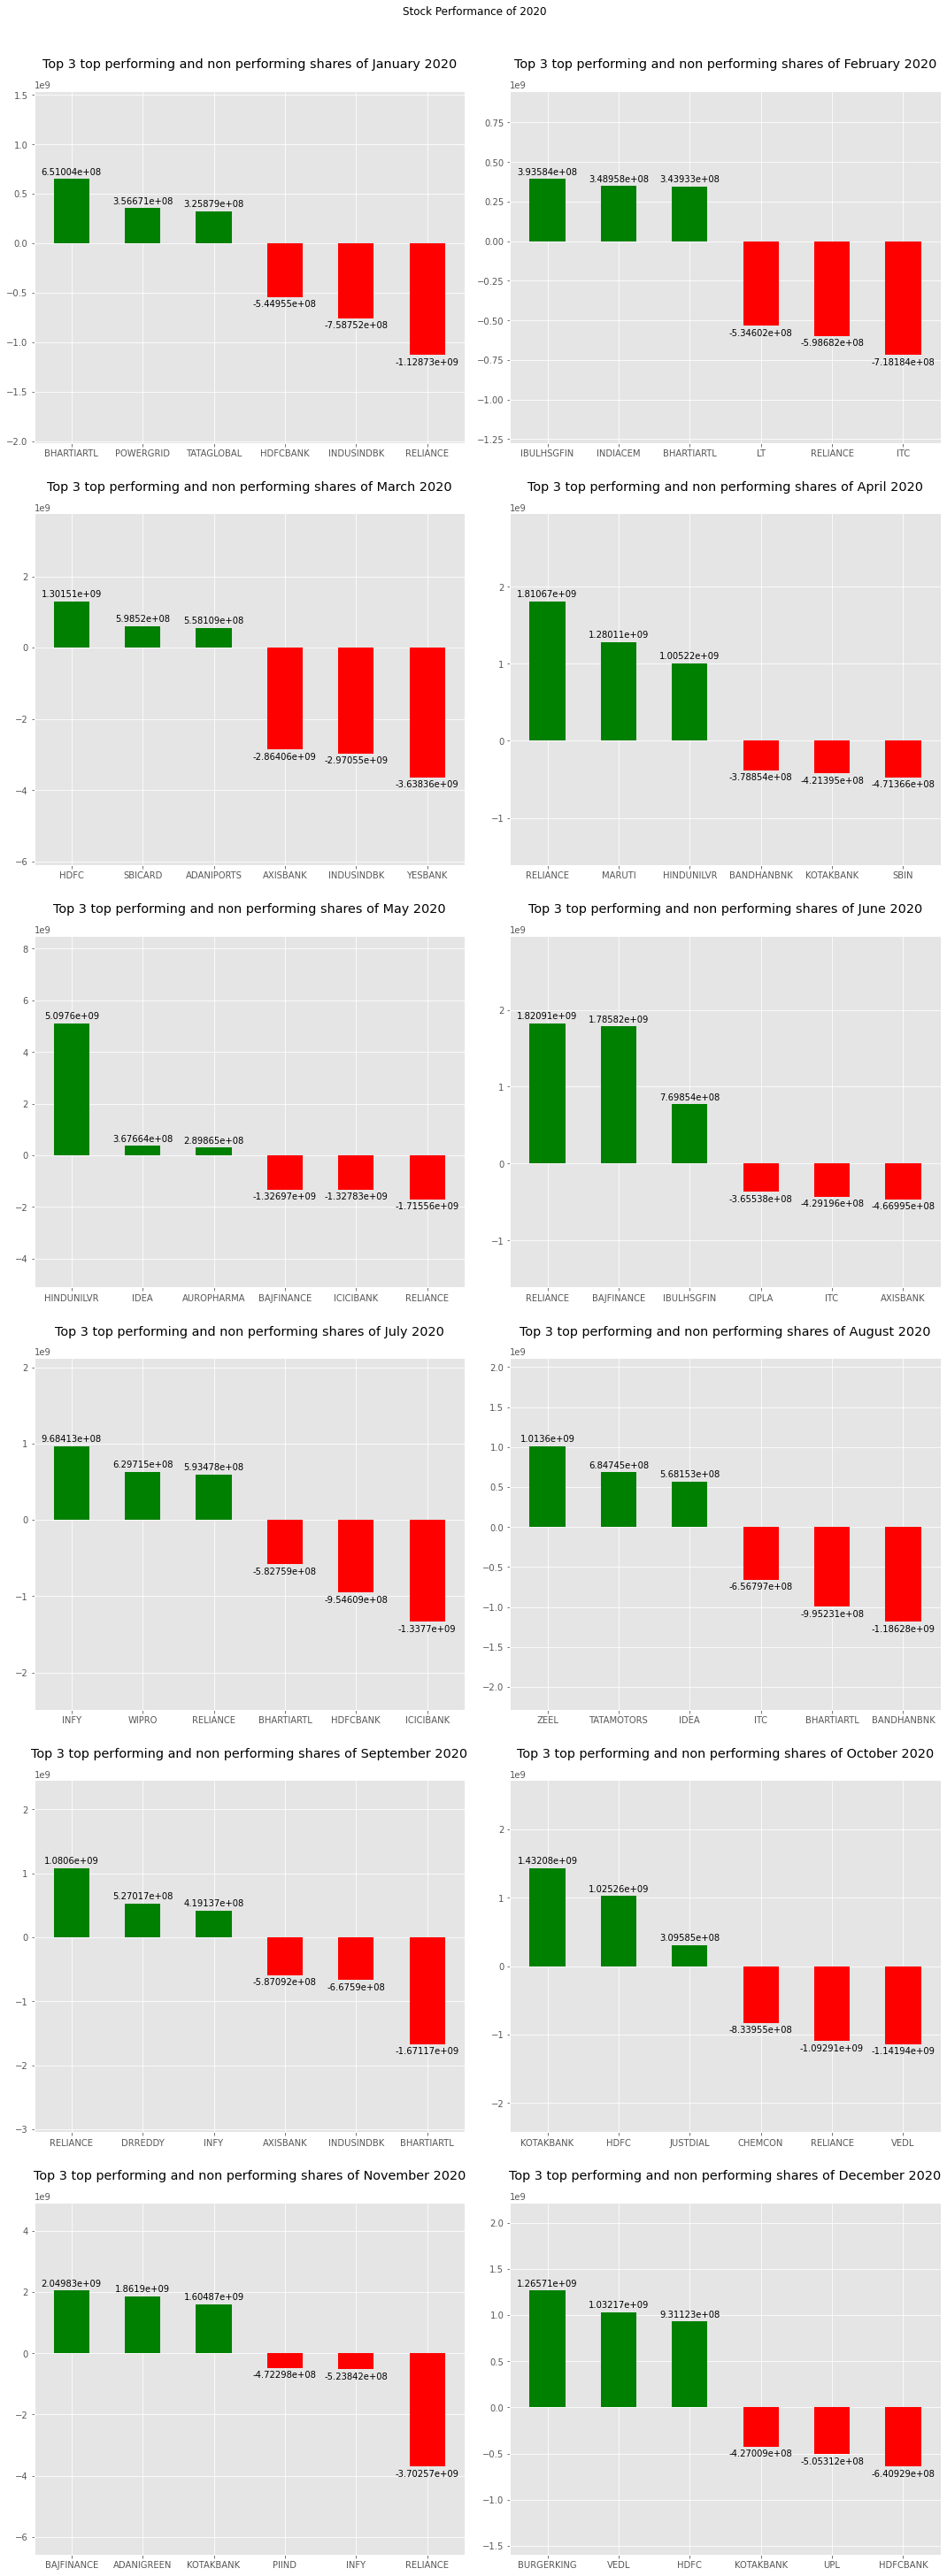

In [5]:
first_n_last(2020)

# Top 3 performers and non performers of year 2021

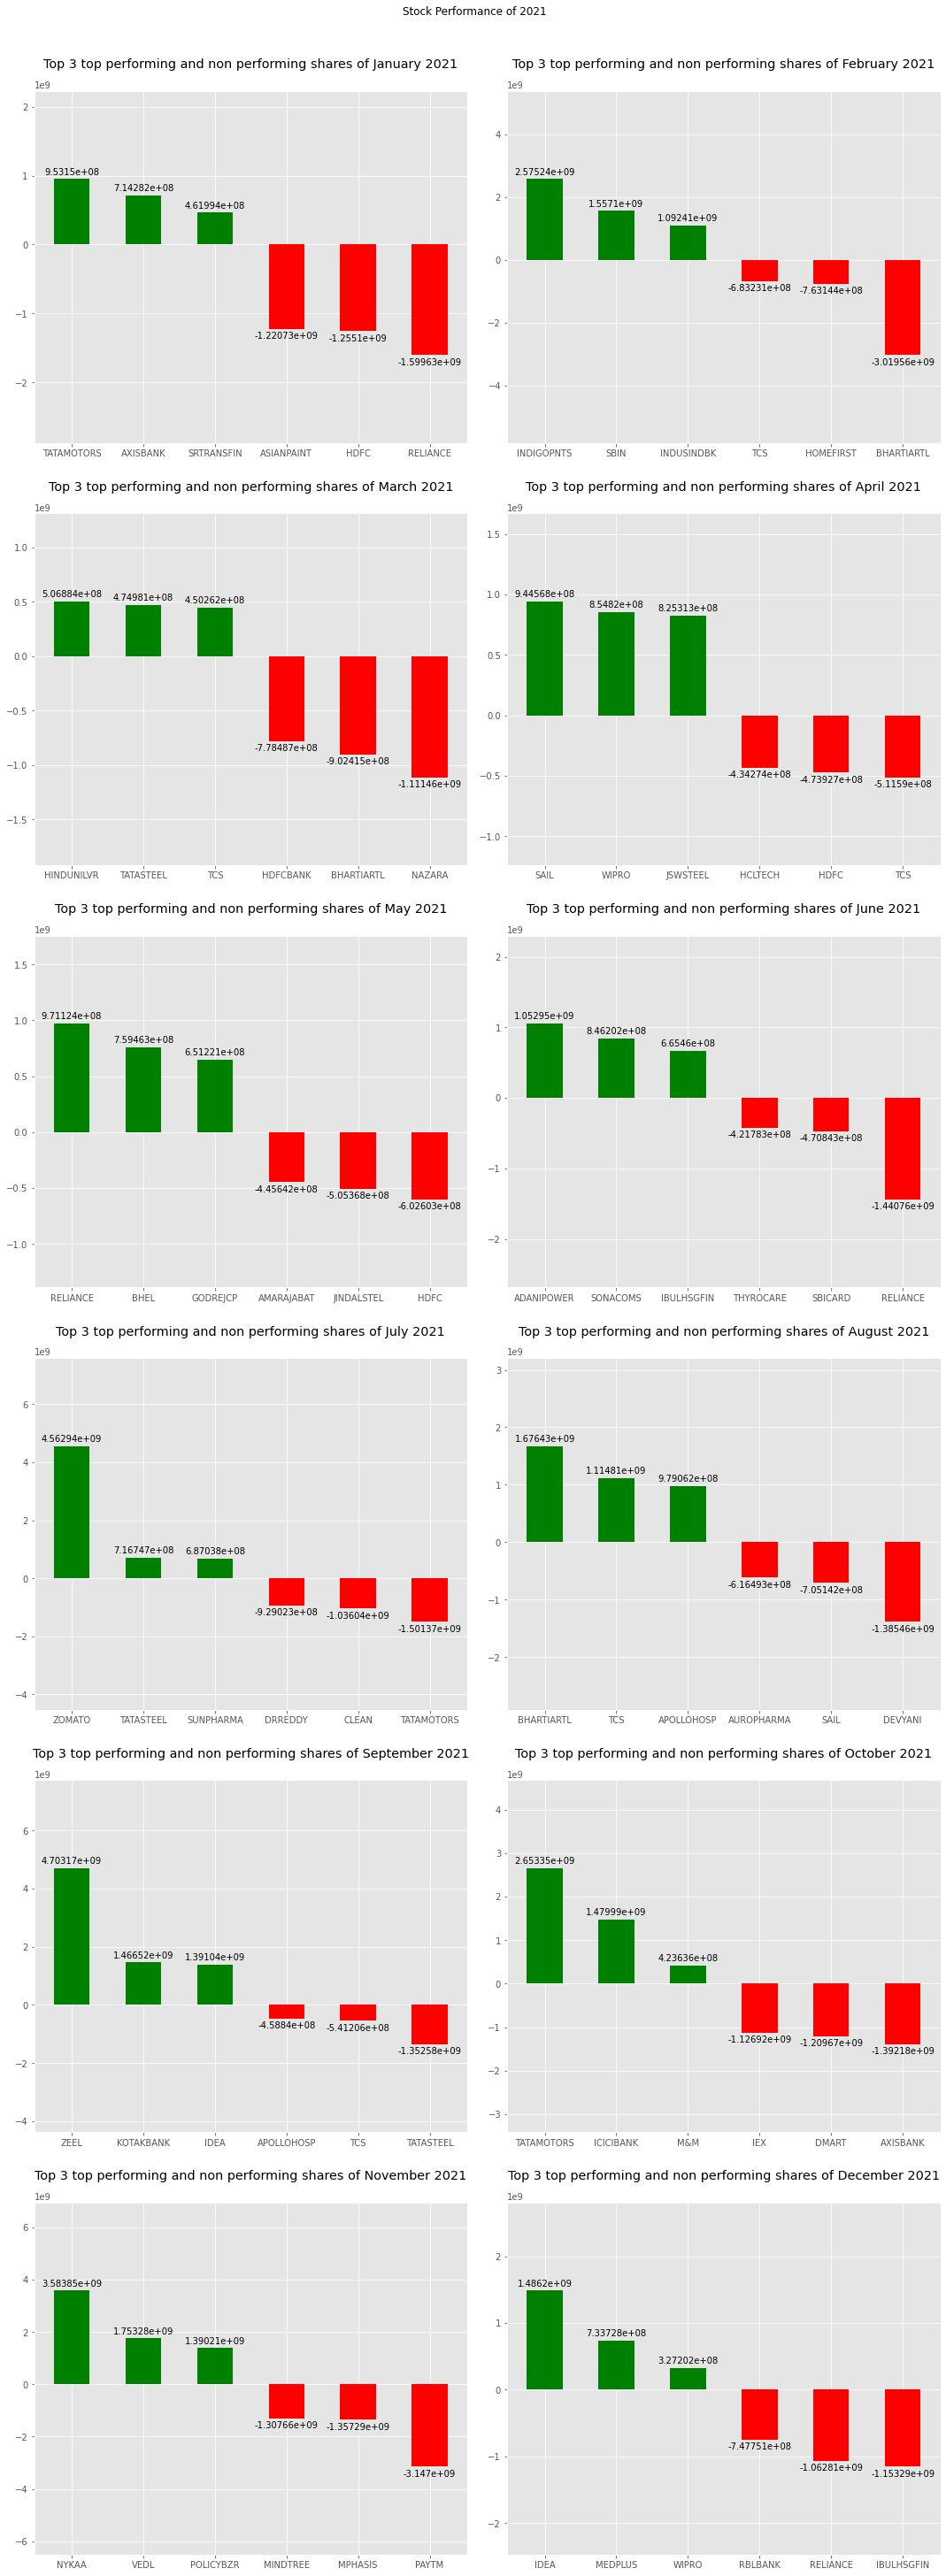

In [6]:
first_n_last(2021)

# Top 3 performers and non performers of year 2022

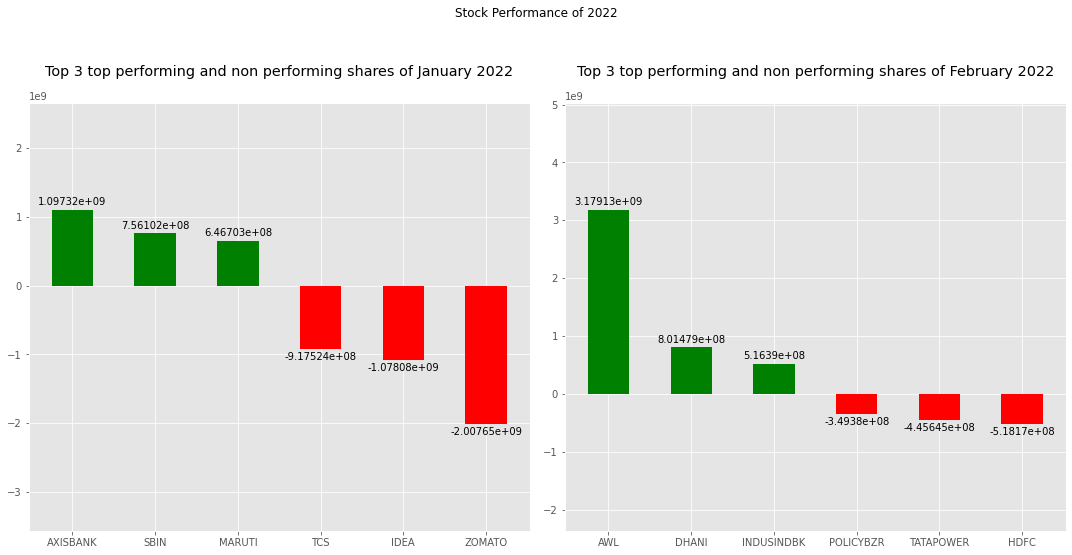

In [7]:
first_n_last(2022)